In [1]:
#from sklearn import datasets
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
#from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_fscore_support as score

Using TensorFlow backend.


In [3]:
train = pd.read_csv('0505final_train.csv')

In [4]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
#train = shuffle(train)

In [5]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [6]:
new_all_feature = preprocessing.scale(train_feature)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [8]:
model = Sequential()

In [9]:
model.add( Dense(units=128, input_shape=[52],            #52,47
                 kernel_initializer='he_normal',
                 kernel_regularizer= regularizers.l2(0.1),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
                 activation='relu') )

In [10]:
model.add(Dropout(0.4))  #ep 300

In [11]:
model.add( Dense(units=64,
                 kernel_initializer='he_normal',  #he_normal
                 kernel_regularizer= regularizers.l2(0.1),   #0.06
#               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
                 activation='relu'))   #relu

In [12]:
model.add(Dropout(0.4))  #ep 100    #0.5  #0.3

In [13]:
model.add( Dense(units=4, 
#                kernel_initializer='normal',
                 activation='softmax'))    # kernel_initializer='normal',

In [14]:
model.compile( optimizer = 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [15]:
#train_history = model.fit(new_all_feature , train_y, 
#                          validation_split=0.1, 
#                          epochs = 500, batch_size=15,verbose=2)  # 50 ,15  # 100, 15 #500,15  #50,171 #100,171 #500,171

In [16]:
train_history = model.fit(new_all_feature , train_y, 
                          validation_split=0.1, 
                          epochs = 500, batch_size=15,verbose=1)

Train on 171 samples, validate on 20 samples
Epoch 1/500
171/171 [==============================] - 0s 1ms/step - loss: 30.2121 - acc: 0.3041 - val_loss: 28.0361 - val_acc: 0.4000
Epoch 2/500
171/171 [==============================] - 0s 122us/step - loss: 27.0495 - acc: 0.4269 - val_loss: 25.4802 - val_acc: 0.4000
Epoch 3/500
171/171 [==============================] - 0s 122us/step - loss: 24.4208 - acc: 0.4912 - val_loss: 23.1101 - val_acc: 0.4000
Epoch 4/500
171/171 [==============================] - 0s 136us/step - loss: 22.1618 - acc: 0.4971 - val_loss: 20.9287 - val_acc: 0.4500
Epoch 5/500
171/171 [==============================] - 0s 134us/step - loss: 20.0119 - acc: 0.5380 - val_loss: 18.9465 - val_acc: 0.4500
Epoch 6/500
171/171 [==============================] - 0s 128us/step - loss: 18.0724 - acc: 0.5673 - val_loss: 17.1296 - val_acc: 0.5000
Epoch 7/500
171/171 [==============================] - 0s 134us/step - loss: 16.3564 - acc: 0.5380 - val_loss: 15.4823 - val_acc: 0.500

Epoch 61/500
171/171 [==============================] - 0s 105us/step - loss: 1.0257 - acc: 0.6784 - val_loss: 1.3584 - val_acc: 0.5000
Epoch 62/500
171/171 [==============================] - 0s 105us/step - loss: 1.0531 - acc: 0.6959 - val_loss: 1.3436 - val_acc: 0.5000
Epoch 63/500
171/171 [==============================] - 0s 105us/step - loss: 1.0286 - acc: 0.7076 - val_loss: 1.3399 - val_acc: 0.5000
Epoch 64/500
171/171 [==============================] - 0s 111us/step - loss: 1.0424 - acc: 0.6901 - val_loss: 1.3292 - val_acc: 0.5000
Epoch 65/500
171/171 [==============================] - 0s 105us/step - loss: 1.0609 - acc: 0.6784 - val_loss: 1.3577 - val_acc: 0.5000
Epoch 66/500
171/171 [==============================] - 0s 105us/step - loss: 1.0294 - acc: 0.6725 - val_loss: 1.3664 - val_acc: 0.5000
Epoch 67/500
171/171 [==============================] - 0s 111us/step - loss: 1.0192 - acc: 0.6901 - val_loss: 1.3504 - val_acc: 0.5000
Epoch 68/500
171/171 [==========================

171/171 [==============================] - 0s 111us/step - loss: 0.9713 - acc: 0.7427 - val_loss: 1.3384 - val_acc: 0.6000
Epoch 122/500
171/171 [==============================] - 0s 111us/step - loss: 0.9598 - acc: 0.7602 - val_loss: 1.3485 - val_acc: 0.6000
Epoch 123/500
171/171 [==============================] - 0s 111us/step - loss: 0.9511 - acc: 0.7310 - val_loss: 1.3621 - val_acc: 0.6000
Epoch 124/500
171/171 [==============================] - 0s 99us/step - loss: 0.9913 - acc: 0.7018 - val_loss: 1.3659 - val_acc: 0.5000
Epoch 125/500
171/171 [==============================] - 0s 111us/step - loss: 0.9627 - acc: 0.7485 - val_loss: 1.3594 - val_acc: 0.6000
Epoch 126/500
171/171 [==============================] - 0s 105us/step - loss: 0.9577 - acc: 0.7368 - val_loss: 1.3717 - val_acc: 0.5500
Epoch 127/500
171/171 [==============================] - 0s 105us/step - loss: 0.9889 - acc: 0.7076 - val_loss: 1.3644 - val_acc: 0.5000
Epoch 128/500
171/171 [==============================] -

171/171 [==============================] - 0s 105us/step - loss: 0.8941 - acc: 0.7895 - val_loss: 1.3636 - val_acc: 0.5500
Epoch 181/500
171/171 [==============================] - 0s 105us/step - loss: 0.9007 - acc: 0.7836 - val_loss: 1.3904 - val_acc: 0.5500
Epoch 182/500
171/171 [==============================] - 0s 111us/step - loss: 0.9343 - acc: 0.7485 - val_loss: 1.4251 - val_acc: 0.5000
Epoch 183/500
171/171 [==============================] - 0s 105us/step - loss: 0.8657 - acc: 0.7953 - val_loss: 1.4164 - val_acc: 0.5500
Epoch 184/500
171/171 [==============================] - 0s 105us/step - loss: 0.9148 - acc: 0.7602 - val_loss: 1.3857 - val_acc: 0.5500
Epoch 185/500
171/171 [==============================] - 0s 105us/step - loss: 0.8928 - acc: 0.7953 - val_loss: 1.4055 - val_acc: 0.6000
Epoch 186/500
171/171 [==============================] - 0s 105us/step - loss: 0.8703 - acc: 0.8070 - val_loss: 1.4248 - val_acc: 0.5500
Epoch 187/500
171/171 [==============================] 

Epoch 240/500
171/171 [==============================] - 0s 105us/step - loss: 0.8268 - acc: 0.8129 - val_loss: 1.3899 - val_acc: 0.6500
Epoch 241/500
171/171 [==============================] - 0s 117us/step - loss: 0.8352 - acc: 0.7895 - val_loss: 1.4589 - val_acc: 0.5000
Epoch 242/500
171/171 [==============================] - 0s 105us/step - loss: 0.8254 - acc: 0.8304 - val_loss: 1.4019 - val_acc: 0.6500
Epoch 243/500
171/171 [==============================] - 0s 105us/step - loss: 0.8221 - acc: 0.8129 - val_loss: 1.3604 - val_acc: 0.6500
Epoch 244/500
171/171 [==============================] - 0s 105us/step - loss: 0.8214 - acc: 0.8363 - val_loss: 1.3950 - val_acc: 0.6000
Epoch 245/500
171/171 [==============================] - 0s 111us/step - loss: 0.8625 - acc: 0.7836 - val_loss: 1.4218 - val_acc: 0.6000
Epoch 246/500
171/171 [==============================] - 0s 128us/step - loss: 0.8311 - acc: 0.8129 - val_loss: 1.4365 - val_acc: 0.5500
Epoch 247/500
171/171 [==================

Epoch 300/500
171/171 [==============================] - 0s 105us/step - loss: 0.7550 - acc: 0.8538 - val_loss: 1.4173 - val_acc: 0.5500
Epoch 301/500
171/171 [==============================] - 0s 105us/step - loss: 0.8030 - acc: 0.8538 - val_loss: 1.3862 - val_acc: 0.5500
Epoch 302/500
171/171 [==============================] - 0s 105us/step - loss: 0.7906 - acc: 0.8596 - val_loss: 1.3521 - val_acc: 0.5000
Epoch 303/500
171/171 [==============================] - 0s 108us/step - loss: 0.7969 - acc: 0.8070 - val_loss: 1.3910 - val_acc: 0.5000
Epoch 304/500
171/171 [==============================] - 0s 105us/step - loss: 0.7719 - acc: 0.8421 - val_loss: 1.3916 - val_acc: 0.5500
Epoch 305/500
171/171 [==============================] - 0s 111us/step - loss: 0.7841 - acc: 0.8421 - val_loss: 1.3813 - val_acc: 0.5500
Epoch 306/500
171/171 [==============================] - 0s 111us/step - loss: 0.7650 - acc: 0.8713 - val_loss: 1.4228 - val_acc: 0.5500
Epoch 307/500
171/171 [==================

Epoch 360/500
171/171 [==============================] - 0s 117us/step - loss: 0.7607 - acc: 0.8538 - val_loss: 1.3821 - val_acc: 0.5500
Epoch 361/500
171/171 [==============================] - 0s 111us/step - loss: 0.7194 - acc: 0.8363 - val_loss: 1.4511 - val_acc: 0.5000
Epoch 362/500
171/171 [==============================] - 0s 105us/step - loss: 0.7538 - acc: 0.8596 - val_loss: 1.4222 - val_acc: 0.5000
Epoch 363/500
171/171 [==============================] - 0s 111us/step - loss: 0.7685 - acc: 0.8538 - val_loss: 1.4619 - val_acc: 0.5500
Epoch 364/500
171/171 [==============================] - 0s 117us/step - loss: 0.7375 - acc: 0.8655 - val_loss: 1.4369 - val_acc: 0.5500
Epoch 365/500
171/171 [==============================] - 0s 117us/step - loss: 0.7776 - acc: 0.8480 - val_loss: 1.4435 - val_acc: 0.6000
Epoch 366/500
171/171 [==============================] - 0s 105us/step - loss: 0.7255 - acc: 0.8830 - val_loss: 1.4286 - val_acc: 0.5500
Epoch 367/500
171/171 [==================

Epoch 420/500
171/171 [==============================] - 0s 116us/step - loss: 0.7181 - acc: 0.8480 - val_loss: 1.5494 - val_acc: 0.4500
Epoch 421/500
171/171 [==============================] - 0s 122us/step - loss: 0.6990 - acc: 0.8480 - val_loss: 1.5577 - val_acc: 0.5000
Epoch 422/500
171/171 [==============================] - 0s 111us/step - loss: 0.7069 - acc: 0.8772 - val_loss: 1.4807 - val_acc: 0.5500
Epoch 423/500
171/171 [==============================] - 0s 111us/step - loss: 0.7388 - acc: 0.8421 - val_loss: 1.4596 - val_acc: 0.5500
Epoch 424/500
171/171 [==============================] - 0s 106us/step - loss: 0.7285 - acc: 0.8596 - val_loss: 1.5097 - val_acc: 0.5500
Epoch 425/500
171/171 [==============================] - 0s 111us/step - loss: 0.6979 - acc: 0.8596 - val_loss: 1.4799 - val_acc: 0.5500
Epoch 426/500
171/171 [==============================] - 0s 111us/step - loss: 0.7151 - acc: 0.8596 - val_loss: 1.4190 - val_acc: 0.5500
Epoch 427/500
171/171 [==================

171/171 [==============================] - 0s 111us/step - loss: 0.6346 - acc: 0.8830 - val_loss: 1.4853 - val_acc: 0.5000
Epoch 480/500
171/171 [==============================] - 0s 111us/step - loss: 0.6831 - acc: 0.8830 - val_loss: 1.5596 - val_acc: 0.5000
Epoch 481/500
171/171 [==============================] - 0s 111us/step - loss: 0.6616 - acc: 0.8713 - val_loss: 1.5000 - val_acc: 0.5500
Epoch 482/500
171/171 [==============================] - 0s 111us/step - loss: 0.6438 - acc: 0.8830 - val_loss: 1.4116 - val_acc: 0.5500
Epoch 483/500
171/171 [==============================] - 0s 111us/step - loss: 0.6927 - acc: 0.8772 - val_loss: 1.4852 - val_acc: 0.5500
Epoch 484/500
171/171 [==============================] - 0s 99us/step - loss: 0.6703 - acc: 0.8713 - val_loss: 1.4069 - val_acc: 0.6000
Epoch 485/500
171/171 [==============================] - 0s 111us/step - loss: 0.6577 - acc: 0.8713 - val_loss: 1.3972 - val_acc: 0.6000
Epoch 486/500
171/171 [==============================] -

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):  #,validation
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

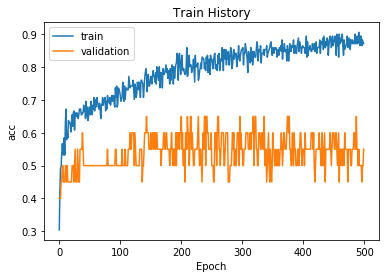

In [18]:
show_train_history(train_history,'acc','val_acc')

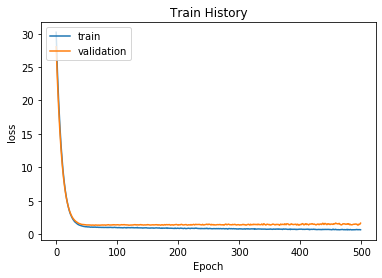

In [19]:
show_train_history(train_history,'loss','val_loss')  #

In [20]:
#test = pd.read_csv('0527test_data_final_real.csv')

In [21]:
test = pd.read_csv('0625test_data_final_real.csv')

In [22]:
test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)

In [23]:
test_feature = test.columns[1:]
test_target = test.columns[0]
test_feature = test[test_feature]
test_y = test[test_target]
test_y = test_y.values
test_y = np_utils.to_categorical(test_y, num_classes = 4)

In [24]:
test_scaledFeatures  = ( ( test_feature - train_feature.mean(axis=0) ) / train_feature.std(axis=0) )

In [25]:
test_out =  model.predict(test_scaledFeatures)

In [26]:
test_out

array([[0.64316785, 0.04476213, 0.19277257, 0.11929742],
       [0.8749044 , 0.05496651, 0.04185395, 0.02827514],
       [0.89215034, 0.07347453, 0.01574984, 0.01862523],
       [0.9647652 , 0.01775376, 0.00797252, 0.00950855],
       [0.73749596, 0.02120573, 0.11205553, 0.12924282],
       [0.46126065, 0.37806937, 0.10652152, 0.05414844],
       [0.59254104, 0.3603455 , 0.02630119, 0.02081234],
       [0.8941893 , 0.01729128, 0.0430606 , 0.04545883],
       [0.8356984 , 0.03624895, 0.06632437, 0.06172835],
       [0.5268401 , 0.28315836, 0.12354343, 0.06645811],
       [0.8425965 , 0.02518455, 0.06840958, 0.06380939]], dtype=float32)

In [27]:
test_out_class =  model.predict_classes(test_scaledFeatures)

In [28]:
test_out_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
test['HOSDAY'].values

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [30]:
#model.score(test_feature, test_y)

In [31]:
pd.crosstab( test['HOSDAY'].values, test_out_class, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0
Actual Species,
0,5
1,6


In [32]:
precision, recall, fscore, support = score( test['HOSDAY'].values, test_out_class)

C:\Users\8064\Anaconda31\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.45454545 0.        ]
recall: [1. 0.]
fscore: [0.625 0.   ]
support: [5 6]


In [34]:
score2 = model.evaluate(test_scaledFeatures, test_y, verbose=2)
score2

[1.5883443355560303, 0.4545454680919647]

In [35]:
#import tensorflowjs as tfjs

In [36]:
#tfjs.converters.save_keras_model(model,'./model_file0707')